# Localização de Anderson

* PET - Física UFRN
* Petiano: Tiago Pernambuco Toledo de Macêdo
* Data: 22/07/2024

$\quad$ A chamada “Localização de Anderson”, fenômeno no qual elétrons em sistemas desordenados tendem a se localizar em regiões pequenas do espaço, é um dos tópicos de maior interesse na física da matéria condensada contemporânea. Neste `Notebook`, exploraremos esse fenômeno no contexto do sistema em que foi estudado pela primeira vez, o modelo de Anderson, descoberto originalmente pelo vencedor do prêmio Nobel de física Philip Warren Anderson em 1957.

$\quad$ Ao longo deste trabalho, veremos como o modelo de Anderson descreve o comportamento de um elétron em uma estrutura cristalina, como o aumento da desordem no sistema faz com que o elétron seja confinado a pequenas regiões do espaço e entenderemos como fenômenos de localização fazem um material passar por uma transição entre condutor e isolante elétrico.

Este `Notebook` está dividido nas seguintes seções:

1. Introdução;
2. O Modelo de Anderson em 1D;
3. Difusão e Localização em 3D;
4. Cálculos de Condutividade;
5. Conclusão;
6. Referências. 

## Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.linalg as la

## Detalhes das Bibliotecas

In [2]:
%load_ext version_information
%version_information Numpy, Scipy, Matplotlib

Software versions
Python 3.9.19 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.18.1
OS Windows 10 10.0.19045 SP0
Numpy 1.24.0
Scipy 1.11.1
Matplotlib 3.9.1
Sun Jul 21 23:05:34 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ Nesta seção entenderemos um pouco da teoria por trás do modelo de Anderson e da física da matéria condensada no geral para melhor entender os fenômenos de localização e transporte a serem estudados.

### 1.1. O Modelo _Tight-Binding_

$\quad$ Imagine uma estrutura cristalina, com átomos organizados em células unitárias como as da figura abaixo que se repetem periodicamente no espaço: 

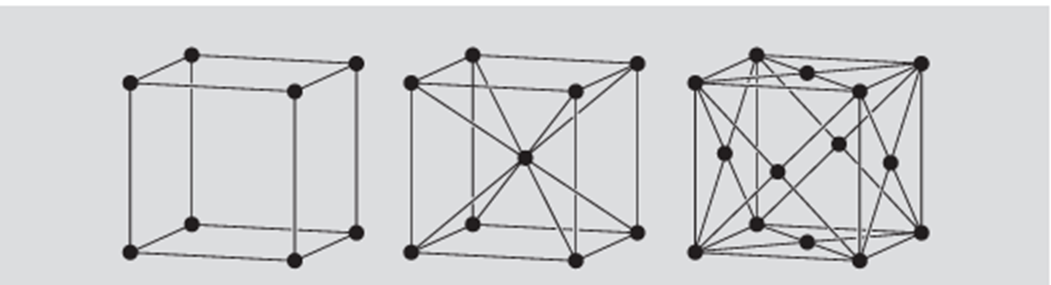

                                                                    Fonte:[1]

$\quad$ Agora imagine que um elétron se move dentro dessa estrutura. Naturalmente, devido à sua carga negativa, o elétron tenderá a se aproximar dos núcleos dos átomos que formam o cristal. Dessa forma, esperamos que elétrons em uma estrutura como essa seja muito provável de serem encontrados nas proximidades dos átomos do que em qualquer outro local do espaço. Caso o cristal seja homogêneo, tendo apenas uma espécie de átomo na sua estrutura, podemos tomar o potencial $V = 0$ em todos os átomos na estrutura cristalina e negligenciar a probabilidade de que um elétron seja encontrado longe de qualquer um dos átomos. Tal que a única energia que o elétron apresenta em qualquer instante de tempo é a energia cinética associada à probabilidade que um elétron tem de “tunelar” de um átomo para o outro (para uma discussão detalhada sobre o fenômeno do tunelamento quântico, recomendo o `Notebook` [Tunelamento Quântico](https://github.com/PETfisicaUFRN/PET.py/blob/main/Notebooks/Tunalamento_quantico.ipynb)).

$\quad$ Uma forma conveniente de se expressar isso é utilizando os formalismos de segunda quantização para expressar o Hamiltoniano do sistema como sendo (desconsiderando efeitos de spin):

$$H = -t\sum_{\langle i,j \rangle} a^{\textdagger}_i a_j + a^{\textdagger}_j a_i. \tag{1}$$ 

Onde $t$ é chamado de “amplitude de salto”, $a^{\textdagger}_i$ e $a_i$ são os operadores fermiônicos de criação e aniquilação na posição $i$ da rede cristalina e a soma se dá em pares de átomos vizinhos. Como seus nomes bem indicam, os operadores de criação (aniquilação), nesse caso, agem no estado do sistema criando (aniquilando) um elétron no $i$-ésimo átomo da rede, tal que cada termo $a^{\textdagger}_i a_j$ remove um elétron do átomo $j$ e adiciona-o ao átomo $i$, movendo efetivamente o elétron entre dois átomos vizinhos. Esse modelo é muito bem conhecido na literatura $\textbf{[1, 2]}$ e é fácil de solucionar analiticamente ao aplicar uma transformada de Fourier. Para simplificar, resolvamos o modelo em uma dimensão, com nossa rede sendo dada por uma cadeia de átomos interligados. As transformadas de Fourier dos operadores $a_j$ e $a^{\textdagger}_j$ serão então dada pelas seguintes expressões:

$$a_j = \frac{1}{\sqrt{N}}\sum_k e^{ijkl}a_k. \tag{2.1}$$

$$a^{\textdagger}_j = \frac{1}{\sqrt{N}}\sum_k e^{-ijkl}a^{\textdagger}_k. \tag{2.2}$$

Onde $i$ aqui é a unidade imaginária, $j$ a posição da rede cristalina e $l$ é a distância entre dois átomos vizinhos. Como estamos trabalhando em 1D, o Hamiltoniano da Equação $\textbf{(1)}$ pode ser simplificado para o seguinte:

$$H = -t\sum_j a^{\textdagger}_{j-1} a_j + a^{\textdagger}_{j+1} a_j. \tag{3}$$

$\quad$ No Hamiltoniano acima, a soma se dá nas posições da cadeia atômica e presumimos condições de contorno periódicas, se um elétron salta da última posição à seguinte, ele volta à primeira e vice-versa. Substituindo as Equações $\textbf{(2)}$ na Equação $\textbf{(3)}$, chegamos à expressão abaixo:

$$H =  \frac{-t}{N}\sum_j \left( \left[ \sum_k e^{-i(j-1)kl}a^{\textdagger}_k\right]\left[\sum_{k'} e^{ijk'l}a_{k'} \right] + \left[ \sum_k e^{-i(j+1)kl}a^{\textdagger}_k\right]\left[\sum_{k'} e^{ijk'l}a_{k'} \right]\right). \tag{4}$$

$\quad$ Como, os produtos $e^{-i(j\pm1)kl}\cdot e^{ijk'l} = e^{ijl(k' - k)}\cdot e^{\mp ijl} = \delta_{kk'}e^{\mp ikl}$, onde $\delta_{kk'} = \begin{cases} 1, & {k = k'}\\ 0, & {k \neq k'} \\ \end{cases}$  para $k \neq k'$ todos os termos dos produtos são $0$ e para $k = k'$ os termos de cada um dos produtos são $e^{-ikl}$ e $e^{ikl}$, respectivamente. Assim, a equação $\textbf{(4)}$ se torna

$$H = \frac{-t}{N} \sum_j \sum_k (e^{-ikl} + e^{ikl})a^{\textdagger}_k a_k =  \frac{-t}{N} \sum_j \sum_k 2 \cos(kl)a^{\textdagger}_k a_k.$$

$\quad$ Como a soma não depende de $j$, isso nos dá simplesmente

$$H = \sum_k -2t\cos(kl) a^{\textdagger}_k a_k. \tag{5}$$

$\quad$ O fato de que a nossa nova expressão para o Hamiltoniano depende de apenas um índice nos mostra que $H$ é diagonal na representação de número de onda, com seus elementos, as autoenergias do sistema, dados por $H_{kk} = -2t\cos(kl)$. Como temos $H$ diagonal na representação de número de onda com suas autoenergias dadas por funções trigonométricas, é natural de se imaginar que as funções de onda correspondentes também sejam periódicas, tanto nessa representação diagonal como na representação de posição. Realmente, como veremos mais para a frente, as autofunções desse Hamiltoniano são dadas por ondas planas!

### 1.2. O Modelo de Anderson

$\quad$ O modelo de Anderson, introduzido por Philip Warren Anderson em 1957 $\textbf{[3]}$, pode ser enxergado como uma extensão do modelo _tight-binding_ original. O Hamiltoniano que descreve o sistema, nesse caso, é dado pela seguinte expressão:

$$H = -t\sum_{\langle i,j \rangle} a^{\textdagger}_i a_j + a^{\textdagger}_j a_i - \frac{W}{2}\sum_i \epsilon_i a^{\textdagger}_i a_i. \tag{6}$$ 

Onde o primeiro termo do Hamiltoniano é simplesmente o Hamiltoniano _tight-binding_, $W$ quantifica a intensidade da desordem no sistema e $\epsilon_i$ consolida essa desordem, sendo selecionado aleatoriamente de uma distribuição uniforme no intervalo $[-1, 1]$. O fato de nosso Hamiltoniano conter uma variável aleatória faz com que muitas vezes não possamos entender os fenômenos descritos por ele por apenas uma simulação numérica, tendo que realizar várias e analisar o comportamento médio do sistema ao longo de todas elas.

$\quad$ O fato de estarmos adicionando ao sistema um potencial que age com intensidade aleatória em cada ponto da nossa rede cristalina pode ser interpretado fisicamente como dispormos aleatoriamente, pelo sistema, impurezas que servem como espalhadores. Tal que, quando um elétron passa próximo a um deles, sua função de onda é espalhada conforme a intensidade de sua interação com o espalhador. O espalhamento da função de onda, dependendo da intensidade da desordem, pode levar a interferências destrutivas na função de onda eletrônica, fazendo com que o elétron fique limitado a pequenas regiões do espaço!

$\quad$ Agora, finalmente, podemos analisar esse problema numericamente e visualizar melhor o que aprendemos até agora.

## 2. O Modelo de Anderson em 1D

$\quad$ O primeiro passo para estudarmos o modelo de Anderson em 1D é definir duas grandezas: $N$, o tamanho da nossa cadeia atômica e a amplitude de salto $t$, que define a energia cinética dos elétrons. Para simplificar, tomaremos $t = 1$ de forma que a energia do nosso sistema é medida em unidades de $t$. Tomemos também $N = 100$ átomos na nossa rede:

In [3]:
N = 100
t = 1

$\quad$ Agora que definimos essa grandeza, podemos, dado um valor de $W$, construir o Hamiltoniano do nosso sistema:

In [4]:
def Hamiltoniano(W, t = t, N = N):
    Hamiltonian = np.zeros((N, N))

    # Adicionando os termos aleatórios à diagonal principal
    for j in range(0, N):
        Hamiltonian[j][j] = rnd.uniform(-W/2, W/2)

        # Condições de contorno periódicas
        if j-1 < 0:
            Hamiltonian[j][j+1] = -t
            Hamiltonian[j][N-1] = -t
            
        # Condições de contorno periódicas    
        if j+1 > N-1:
            Hamiltonian[j][j-1] = -t
            Hamiltonian[j][0] = -t

        # Adicionando os termos gerais de fora da diagonal principal
        else:
            Hamiltonian[j][j+1] = -t
            Hamiltonian[j][j-1] = -t  
            
    return Hamiltonian

$\quad$ Com essa função definida, podemos efetivamente construir nossos Hamiltonianos agora. Comecemos com o caso extremo $W = 0$, para o qual $H$ se reduz ao Hamiltoniano do modelo _tight-binding_.

In [5]:
Ham = Hamiltoniano(0)

In [6]:
Ham

array([[ 0., -1.,  0., ...,  0.,  0., -1.],
       [-1.,  0., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0., -1.],
       [-1.,  0.,  0., ...,  0., -1.,  0.]])

$\quad$ O nosso Hamiltoniano é uma matriz $N \times N = 100 \times 100$, em que todos os termos da diagonal principal são $0$. Assim como os termos fora dela, a não ser os termos das diagonais adjacentes e os extremos da diagonal secundária, representando os saltos entre vizinhos próximos e as condições de contorno, respectivamente. Esses últimos termos são todos $-t = -1$.

$\quad$ Outra coisa que podemos checar é se nosso Hamiltoniano é uma matriz Hermitiana, ou seja, verificar se $H = H^{\textdagger}$. Na mecânica quântica, tipicamente se impõe aos Hamiltonianos de sistemas físicos a condição de Hermiticidade uma vez que matrizes Hermitianas tem todos os seus autovalores reais, e, no caso do operador Hamiltoniano, os autovalores representam as energias possíveis do sistema, que não fariam sentido físico se tivessem parte imaginária. Como todas os elementos matriciais de $H$ são reais, essa condição é equivalente à simetria, ou seja, $H = H^T$. Para isso, podemos utilizar a função do módulo `scipy.linalg` (que importamos como `la`) `la.ishermitian`, que retorna `True` se o argumento for uma matriz Hermitiana e `False` caso contrário.

In [7]:
la.ishermitian(Ham)

True

$\quad$ A nossa matriz é Hermitiana! Isso é um bom sinal de que estamos no caminho certo. O próximo passo agora é encontrar os autovalores e autovetores de $H$, que correspondem às energias permitidas ao sistema e às funções de onda correspondentes. Podemos, para isso, utilizar a função `la.eigh`, que resolve problemas de autovalor para matrizes Hermitianas.

In [8]:
autovalores, autovetores = la.eigh(Ham)

$\quad$ Agora que temos nossas energias e funções de onda, podemos começar a visualizá-las. A função `eigh` retorna uma lista de autovalores em ordem crescente, tal que o estado fundamental do sistema tem energia `autovalores[0]` e a função de onda correspondente é dada pela primeira coluna da matriz de autovetores, `autovetores[:, 0]`. Sabendo disso, vamos plotar o gráfico da função de onda do estado fundamental e ver sua energia:

A energia deste estado é -1.9999999999999987


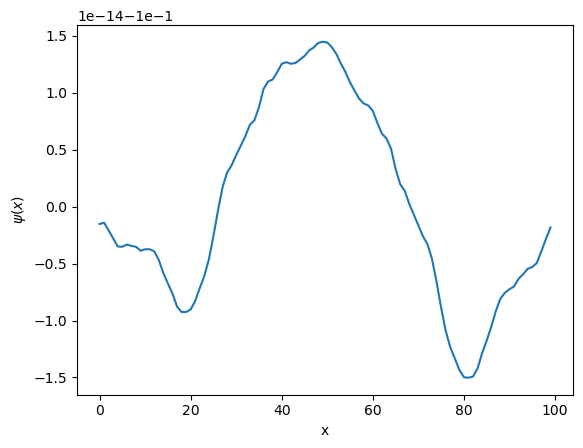

In [9]:
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.plot(autovetores[:, 0])
print('A energia deste estado é', autovalores[0])

$\quad$ A energia do estado é $E_0 \approx -2 = -2t\cos(0)$, exatamente o que calculamos analiticamente! O gráfico, porém, parece um tanto quanto estranho. Se prestarmos atenção ao canto superior esquerdo da figura, veremos que o eixo das ordenadas mede variações de ordem $10^{-14}$ ao redor do valor $10^{-1}$. Observaremos o gráfico da distribuição de probabilidade associada, $|\psi(x)|^2$ para entender melhor isso:

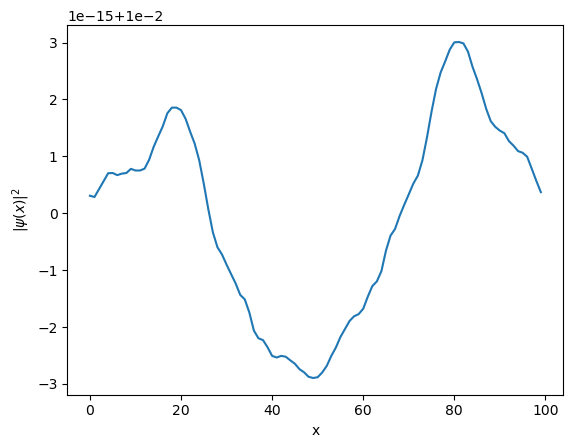

In [10]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(autovetores[:, 0]**2)

$\quad$ O que nós temos aqui são variações minúsculas (de ordem $10^{-15}$) ao redor do valor $10^{-1} = \frac{1}{100} = \frac{1}{N}$. Na prática, o que está acontecendo, é que no estado fundamental, o elétron apresenta uma distribuição de probabilidade uniforme ao longo dos 100 átomos da nossa cadeia, tendo probabilidade $0.01$ de ser encontrado em cada um deles. Vamos agora visualizar alguns dos estados excitados do nosso sistema:

A energia deste estado é -1.9960534568565433


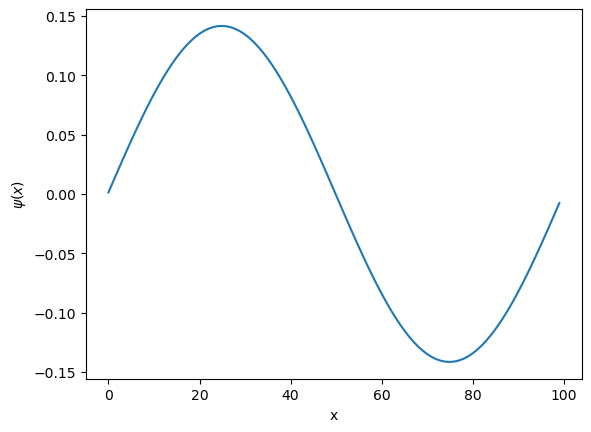

In [11]:
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.plot(autovetores[:, 1])
print('A energia deste estado é', autovalores[1])

$\quad$ Para esse primeiro estado, a função de onda é uma função periódica, como havíamos predito anteriormente! Vamos agora visualizar o que acontece com as distribuições de probabilidade conforme olhamos para outros estados excitados:

In [12]:
# Calculando as probabilidades de se encontrar o elétron em uma dada posição para cada autoestado
probabilidades = np.array([x**2 for x in autovetores])

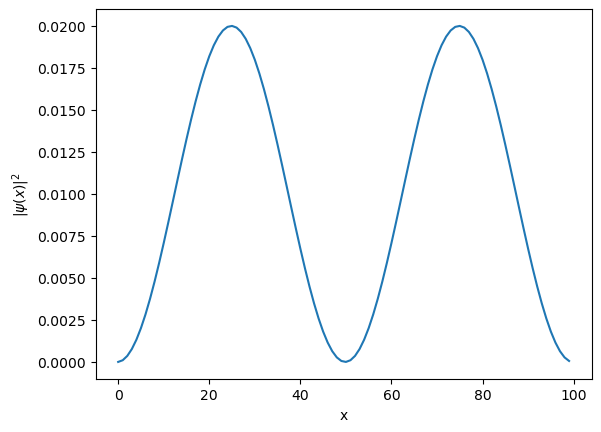

In [13]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(probabilidades[:, 1])

A energia deste estado é -1.9960534568565413


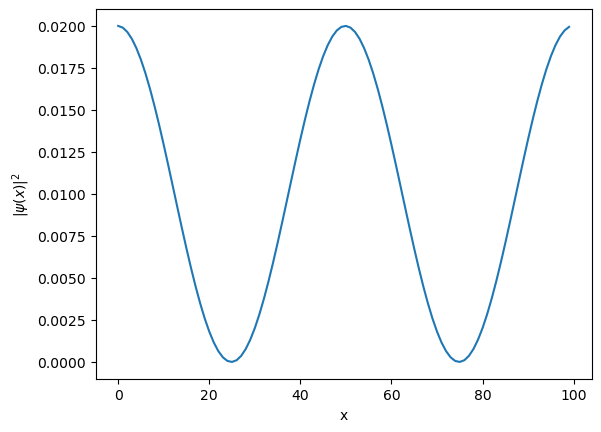

In [14]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(probabilidades[:, 2])
print('A energia deste estado é', autovalores[2])

A energia deste estado é -1.9842294026289549


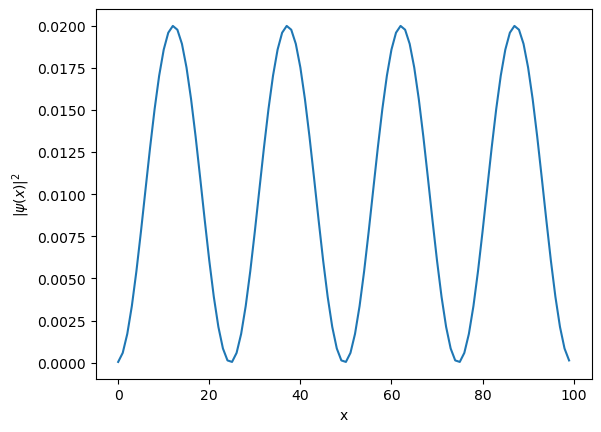

In [15]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(probabilidades[:, 3])
print('A energia deste estado é', autovalores[3])

A energia deste estado é -1.9842294026289544


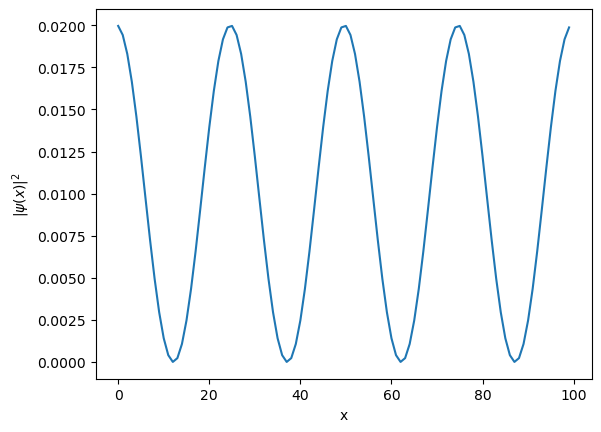

In [16]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(probabilidades[:, 4])
print('A energia deste estado é', autovalores[4])

$\quad$ São todos funções periódicas! Uma outra coisa a notar, é que as autoenergias dos estados de índice $1$ e $2$ e as dos estados $3$ e $4$ são iguais! Isso mostra que nosso sistema apresenta energias degeneradas, com dois estados diferentes possíveis para cada valor de energia acima da energia do estado fundamental.

$\quad$ Agora que analisamos o caso sem desordem, podemos introduzir aleatoriedade no sistema ao escolher um valor de $W \neq 0$. Tomemos primeiro $W = 20$ para ver o que acontece.

In [17]:
Ham2 = Hamiltoniano(20)

In [18]:
Ham2

array([[-4.50171761, -1.        ,  0.        , ...,  0.        ,
         0.        , -1.        ],
       [-1.        ,  8.15459913, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        , -8.47810818, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -6.38885528,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.07433242, -1.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.        ,  9.35848356]])

In [19]:
la.ishermitian(Ham2)

True

$\quad$ Podemos ver que agora a diagonal principal do nosso Hamiltoniano apresenta valores aleatórios entre $-10$ e $10$, como estabelecemos anteriormente. Como os valores aleatório são adicionados apenas à diagonal principal, isso não afeta a simetria (e consequentemente, a hermiticidade) do operador. Visualizaremos, a seguir, o primeiro estado excitado do Hamiltoniano desordenado:

In [20]:
vals, vecs = la.eigh(Ham2)

A energia deste estado é -10.159731873659348


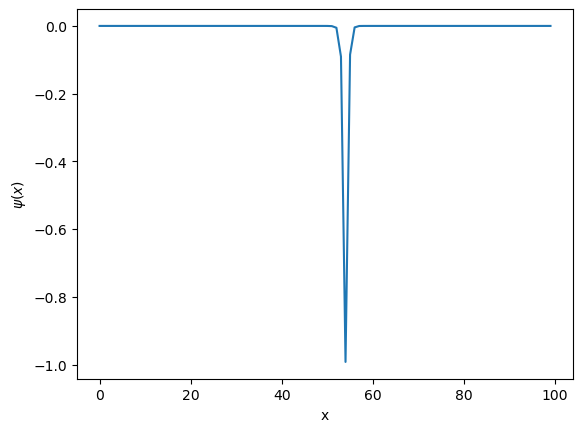

In [21]:
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.plot(vecs[:, 1])
print('A energia deste estado é', vals[1])

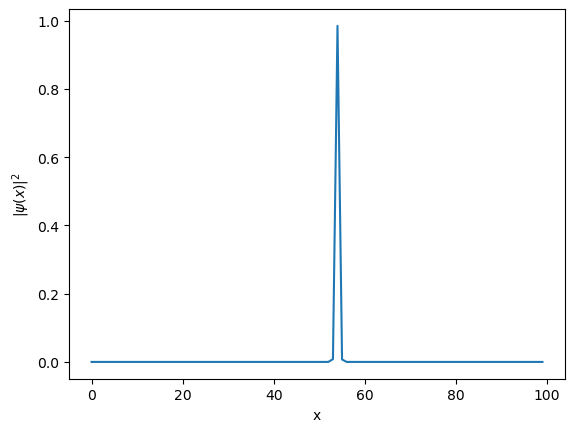

In [22]:
plt.xlabel('x')
plt.ylabel(r'$|\psi(x)|^2$')
plt.plot(vecs[:, 1]**2)

In [23]:
print((vecs[:, 1]**2)[27])

2.8259405318234775e-34


In [24]:
print((vecs[:, 1]**2)[28])

1.3883917818269987e-32


In [25]:
print((vecs[:, 1]**2)[29])

5.08745049823443e-34


In [26]:
print(sum(vecs[:, 1][27:30]**2))

1.4675256921275776e-32


$\quad$ O gráfico é um único pico! Quando aumentamos o valor de $W$ de $0$ para $20$, o elétron na nossa cadeia atômica passou a ficar fortemente localizado no átomo de número $28$, tendo uma probabilidade de $\approx 96.4%$ de encontrarmos ele lá, ao medir a posição do elétron. O resto da probabilidade ficou concentrada nos átomos vizinhos a ele, totalizando uma probabilidade de $\approx 99.98%$ encontrar o elétron entre os átomos $27$ e $29$.

$\quad$ O fato de que cada vez que construímos o Hamiltoniano, obtemos valores diferentes na diagonal principal faz com que o elétron se localize em posições diferentes. Para obtermos uma análise mais fiel de quão localizados são os autoestados do Hamiltoniano para um dado valor de $W$, precisamos de alguma média entre vários valores. Para quantificar isso, vamos primeiro introduzir a quantidade conhecida como _Inverse Participation Ratio_ (IPR), ou, em português, “taxa de participação inversa”. O IPR é definido como mostrado abaixo:

$$IPR(\psi) = \sum_j |\psi_j|^4. \tag{7}$$

$\quad$ A motivação por trás dessa quantidade é a seguinte: a soma dos valores $|\psi_j|^2$ em todo o espaço tem de ser $1$, pois a partícula tem que estar em algum ponto do espaço em qualquer instante de tempo. A soma dos $|\psi|^4$, porém, não obedece à mesma restrição. Quando as probabilidades de encontrar o elétron forem bem distribuídas, ou seja, a função de onda for bem difundida, $IPR(\psi) << 1$. Quando a função de onda for extremamente localizada, por outro lado, $IPR(\psi) \approx 1$. Para visualizar isso, computaremos o IPR do estado fundamental do Hamiltoniano sem desordem, onde a distribuição de probabilidade era uniforme no espaço, e do primeiro estado excitado do Hamiltoniano desordenado, de onde vimos forte localização numa região pequena do espaço.

In [27]:
def IPR(autovetor):
    return np.sum(autovetor**4)

In [28]:
print('O IPR do estado difusivo é', IPR(autovetores[:, 0]))
print('O IPR do estado localizado é', IPR(vecs[:, 1]))

O IPR do estado difusivo é 0.010000000000000004
O IPR do estado localizado é 0.9694753029851818


$\quad$ Assim, a taxa de participação inversa é uma boa representação do quão localizado um estado é. Uma forma típica de visualizar isso para um valor específico de $W$ é fazer o gráfico da média das autoenergias do sistema $E_{médio}$ contra o inverso do IPR médio, $\frac{1}{IPR_{médio}}$. Vamos agora implementar uma função para fazer isso!

In [29]:
def IPR_medio_inverso(m, w, HamFunc, N):

    # Inicializando os vetores
    avgIPRvec = np.zeros(N)
    avgEn = np.zeros(N)

    # Realizando m repetições para tomar a média
    for i in range(m):

        # Variável temporária para armazenar os IPRs de cada iteração
        IPRvec = []

        # Criar o Hamiltoniano com a desordem w desejada
        H = HamFunc(w)

        # Calcular os autovalores e autovetores de H
        En, Ev = la.eigh(H)

        # Somar a contribuição desta iteração para a média das energias
        avgEn += En/m

        # Calculando o IPR de cada um dos autovetores dessa iteração
        for j in range(N):
    
            IPRvec.append(IPR(Ev[:, j]))
            
        # Somando a contribuição desta iteração para a média dos IPRs
        avgIPRvec += np.array(IPRvec)/m

    # Retornando os valores de energia média e os inversos dos IPRs médios para realizarmos os plots
    return avgEn, 1/avgIPRvec 

$\quad$ A função `IPR_medio_inverso` recebe como argumentos a quantidade de repetições `m` para computar a média, o valor de $W$, a função que constrói o Hamiltoniano e o tamanho do sistema e nos retorna as energias médias e os inversos dos IPRs médios. A especificação dos dois últimos argumentos da função é importante para que possamos reaproveitar essa função com outros sistemas mais para a frente. Vamos agora ver o resultado que essa função nos dá:

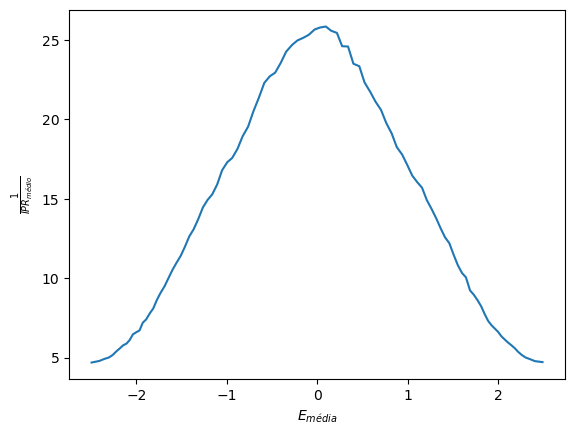

In [30]:
Energias, IPRs = IPR_medio_inverso(2000, 2, Hamiltoniano, N = N)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
plt.plot(Energias, IPRs)

$\quad$ Vemos aqui que, nesse caso, a curva gerada por esse gráfico é bem suave, ainda com algumas leves flutuações devido à aleatoriedade do Hamiltoniano. Outro ponto a se destacar é que mesmo para um valor pequeno de desordem como $W = 2$, os valores de $\frac{1}{IPR_{médio}}$ são razoavelmente baixos, mostrando que nenhum dos autoestados do Hamiltoniano é verdadeiramente difusivo. Isso reflete um fato demonstrado por Neville Mott em 1961 $\textbf{[5]}$: em uma única dimensão, mesmo que fracamente, todos os estados desordenados são localizados. Isso nos dá um caminho óbvio para o próximo passo da nossa investigação: sistemas de maior dimensionalidade.

## 3. Difusão e Localização em 3D

$\quad$ Para estudar o modelo de Anderson em 3 dimensões, precisamos especificar primeiro uma geometria para nossa rede cristalina. Tomemos aqui uma geometria cúbica de lado $L$, tal que o número de átomos na rede seja $N = L^3$. Utilizaremos $L = 10$ para um total de $N = 1000$ átomos.

In [31]:
L = 10

$\quad$ Agora que definimos nosso valor para $L$, precisamos decidir uma forma de numerar as posições do nosso cubo e estabelecer as relações de vizinhança para os termos de salto quântico. Uma forma de fazer isso é a seguinte: tomemos uma cadeia numerada de $0$ a $L-1$. Tomemos depois uma segunda cadeia atrás dela numerada de $L$ a $2L-1$, repetindo sucessivamente até formarmos um quadrado $L \times L$ com os átomos de $0$ até $L^2 -1$. Ponhamos então uma cadeia numerada de $L^2$ até $L^2 + L - 1$ acima da primeira cadeia e completemos os quadrados assim como anteriormente até que nosso cubo também tenha altura $L$.

$\quad$ Implementaremos isso na função `Hamiltoniano3D` abaixo, com condições de contorno periódicas análogas às do caso 1D para cada uma das faces do cubo.

In [32]:
def Hamiltoniano3D(W, t = t, N = L):
    Hamiltonian = np.zeros((N**3, N**3))
    
    for j in range(0, N**3):

        # Termos aleatórios da diagonal principal
        Hamiltonian[j][j] = rnd.uniform(-W/2, W/2)

        # Condição de contorno: face esquerda do cubo
        if j%N == 0:
            Hamiltonian[j][j + N - 1] = -t
        else:
            Hamiltonian[j][j - 1] = -t

        # Condição de contorno: face direita do cubo
        if j%N == N - 1:
            Hamiltonian[j][j - N + 1] = -t
        else:
            Hamiltonian[j][j + 1] = -t

        # Condição de contorno: face frontal do cubo
        if j%N == j%N**2:
            Hamiltonian[j][j + N**2 - N] = -t
        else:
            Hamiltonian[j][j - N] = -t

        # Condição de contorno: face traseira do cubo
        if j%N == j%N**2 - N**2 + N:
            Hamiltonian[j][j - N**2 + N] = -t
        else:
            Hamiltonian[j][j + N] = -t

        # Condição de contorno: face inferior do cubo
        if j < N**2:
            Hamiltonian[j][j + N**3 - N**2] = -t
        else:
            Hamiltonian[j][j - N**2] = -t

        # Condição de contorno: face superior do cubo
        if j >= N**3 - N**2:
            Hamiltonian[j][j - N**3 + N**2] = -t
        else:
            Hamiltonian[j][j + N**2] = -t
            
    return Hamiltonian

$\quad$ Agora, na rede cúbica, cada átomo não tem mais apenas 2 vizinhos e sim 6! Vamos agora visualizar nosso novo Hamiltoniano para um valor de $W = 2$:

In [33]:
H_3D = Hamiltoniano3D(2)

In [34]:
H_3D.shape

(1000, 1000)

In [35]:
la.ishermitian(H_3D)

True

In [36]:
H_3D

array([[ 0.22880464, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.13950453, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  0.81024747, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.99435787,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.6611459 , -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.        ,  0.09018323]])

$\quad$ Parece bom! A numeração que utilizamos para as posições da rede faz com que a matriz desse Hamiltoniano seja mais difícil de interpretar, mas a condição de hermiticidade também está satisfeita. Ainda temos, porém, um problema: agora que nosso sistema é tridimensional, não podemos simplesmente fazer um gráfico da função de onda ou da distribuição de probabilidade. Precisaremos ser um pouco mais criativos na visualização dos comportamentos do nosso sistema!

$\quad$ Para visualizar a função distribuição de probabilidade, construiremos uma função que mostra um cubo em 3D e coloca em cada posição dele uma esfera de tamanho proporcional à probabilidade de encontrar o elétron nessa posição. Para fazer isso, tenhamos em mente que, com a forma que numeramos o cubo, o índice de cada átomo pode ser relacionado às suas coordenadas pela seguinte fórmula:

$$i = x + Ly + L^2z. \tag{8}$$

$\quad$ Dessa forma, dado que tenhamos $i$, $x = i \pmod{L}$, $y = [i-x] \pmod{L^2}$ e $z = \frac{i-x-y}{L^2}$. Vamos agora implementar isso na função `Plot3D`, que recebe como argumento um vetor de estado `Psi` e plota o gráfico que imaginamos:

In [37]:
def Plot3D(Psi):
    
    fig = plt.figure()
    fig.set_size_inches(8, 8, 8)
    ax = fig.add_subplot(projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.zaxis.labelpad = -3.0

    # Extraindo o valor de L do estado
    L = int(len(Psi)**(1/3))

    for i in range(L**3):
        #Calculando x, y e z
        x = i%L
        y = (i - x)%L**2/L
        z = (i - x - L*y)/L**2

        #Plotando as esferas com tamanho proporcional às probabilidades
        ax.scatter(x, y, z, s = 1000*Psi[i]**2, color = 'purple')

    plt.show()

$\quad$ Ótimo! Agora que a função `Plot3D` está pronta, vamos utilizar ela para visualizar o estado de índice 1 para o Hamiltoniano que construímos e alguns outros valores de $W$:

In [38]:
autovalores3D, autovetores3D = la.eigh(H_3D)

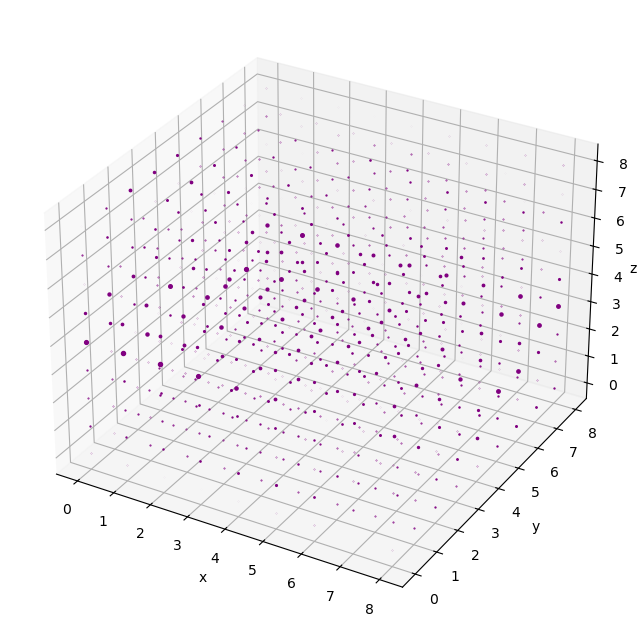

In [39]:
Plot3D(autovetores3D[:, 1])

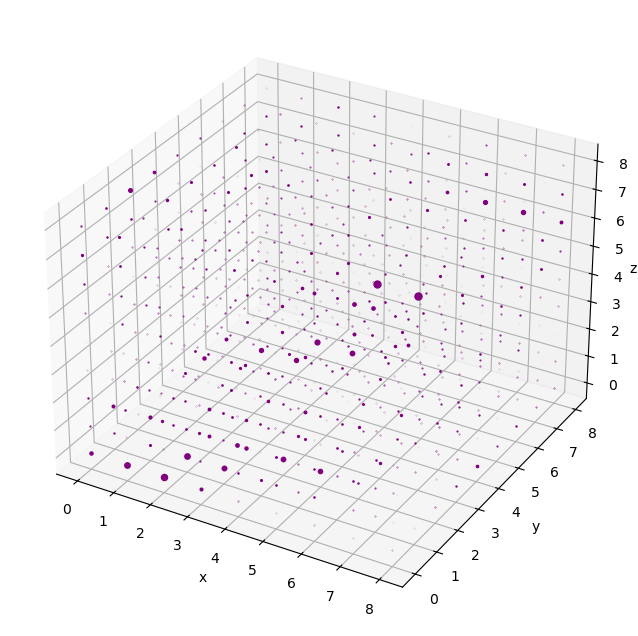

In [40]:
H1 = Hamiltoniano3D(6.5)
autovalores1, autovetores1 = la.eigh(H1)
Plot3D(autovetores1[:, 1])

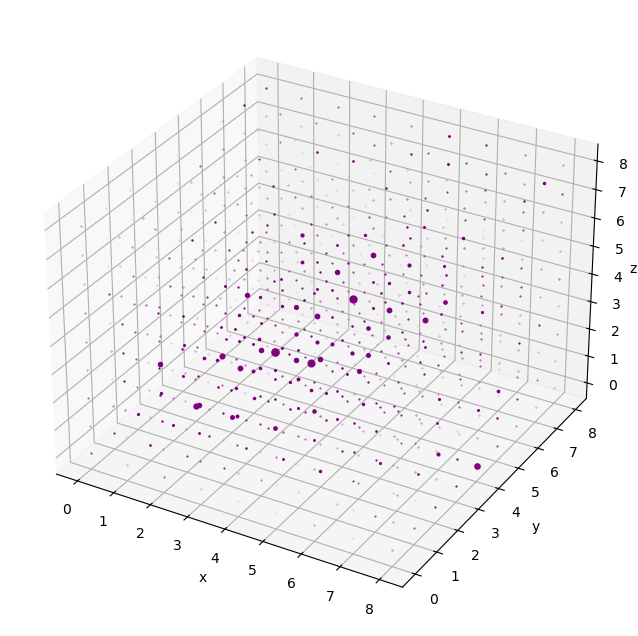

In [41]:
H2 = Hamiltoniano3D(10.0)
autovalores2, autovetores2 = la.eigh(H2)
Plot3D(autovetores2[:, 1])

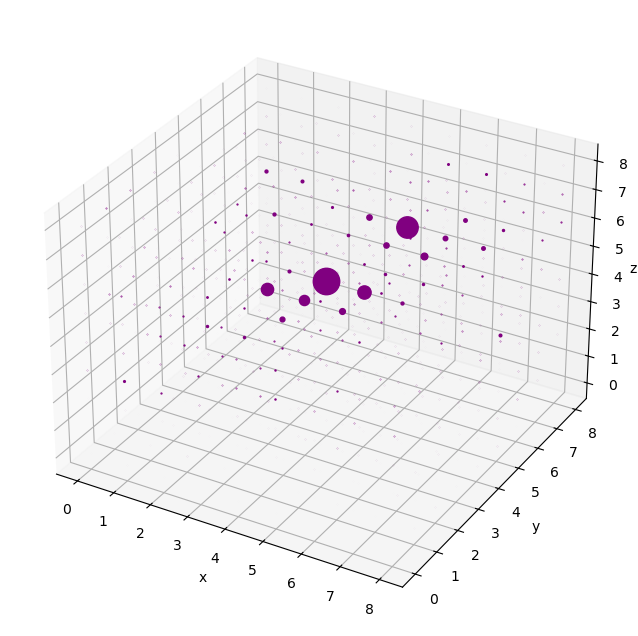

In [42]:
H3 = Hamiltoniano3D(16.5)
autovalores3, autovetores3 = la.eigh(H3)
Plot3D(autovetores3[:, 1])

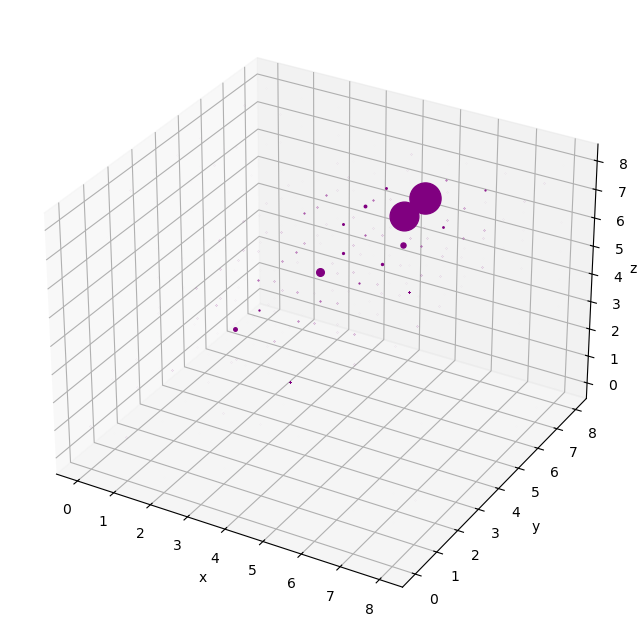

In [43]:
H4 = Hamiltoniano3D(25.0)
autovalores4, autovetores4 = la.eigh(H4)
Plot3D(autovetores4[:, 1])

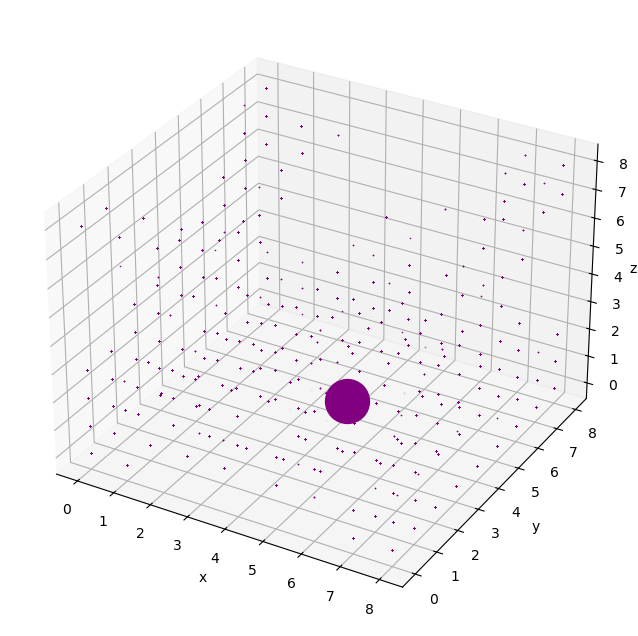

In [44]:
H5 = Hamiltoniano3D(1000.0)
autovalores5, autovetores5 = la.eigh(H5)
Plot3D(autovetores5[:, 1])

$\quad$ É fácil de ver nas figuras acima que, conforme aumentamos a desordem no sistema, as bolas pequenas vão ficando cada vez menores e dando espaço a bolas maiores localizadas em pontos aleatórios do espaço. Até que, na última figura, onde $W = 1000.0$, temos apenas uma esfera muito grande com uma distribuição aproximadamente uniforme de valores muito pequenos pelo resto do cubo. Isso nos mostra que, quanto mais forte a desordem, mais forte a localização! É importante notar que, entre os valores de $W = 16.5$ e $W = 25.0$ ocorre uma grande mudança no comportamento da função de densidade de probabilidade do elétron: isso se dá, pois o valor de $W_{crítico} \approx 16.5$ $\textbf{[6]}$ é o valor de $W$ para o qual o sistema passa por uma transição de fase entre uma fase condutora ($W < W_{crítico}$) e uma fase isolante ($W > W_{crítico}$). Na fase condutora, a função de onda é deslocalizada e o elétron pode viajar livremente pela estrutura cristalina; na isolante, a função de onda do elétron é fortemente localizada e ele está confinado a algumas poucas posições possíveis, não podendo se movimentar livremente pela rede.

$\quad$ Agora que entendemos como se comporta o modelo de Anderson em 3D, vamos fazer o que nos motivou originalmente a estudar esse modelo em maiores dimensões: a taxa de participação inversa. Utilizaremos a função `IPR_medio_inverso` que havíamos criado para computar os valores a serem plotados agora para o Hamiltoniano 3D.

##### Aviso: A célula abaixo contém milhares de operações com matrizes 1000 x 1000, então rodar ela novamente pode demorar bastante. Caso queira realizar seu próprio estudo utilizando este `Notebook`, talvez valha a pena reduzir o tamanho do sistema ou o número de repetições para computar as médias das energias e dos IPRs, mesmo que isso diminua um pouco a precisão dos cálculos.

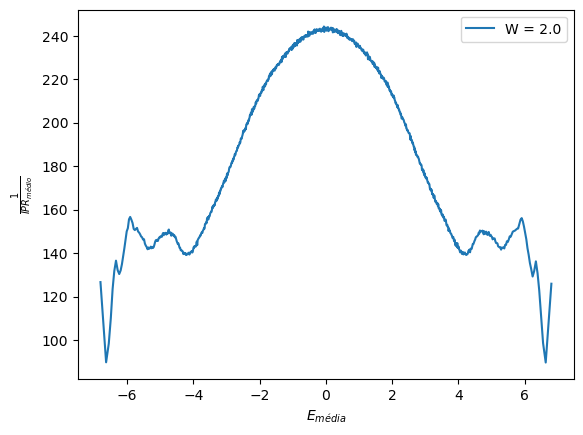

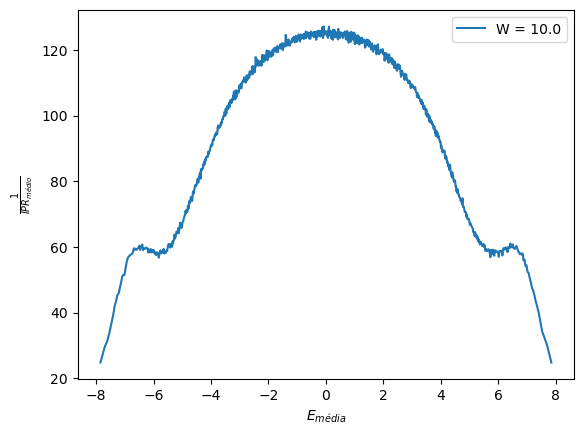

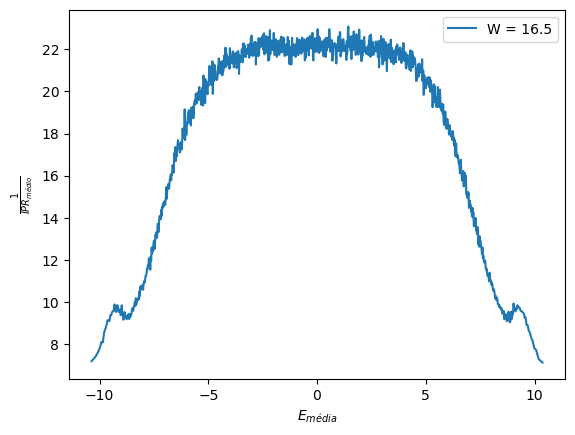

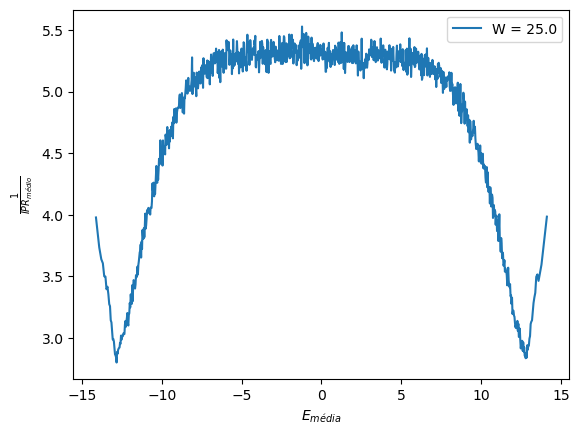

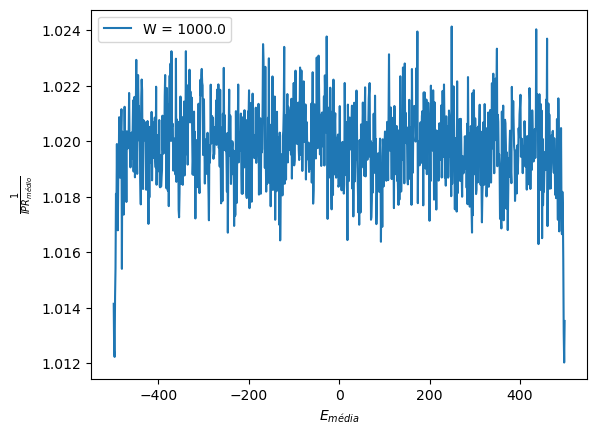

In [45]:
plt.figure(0)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
E1, IPR1 = IPR_medio_inverso(m = 3000, w = 6.5, HamFunc = Hamiltoniano3D, N = L**3)
plt.plot(E1, IPR1, label = 'W = 2.0')
plt.legend()

plt.figure(1)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
E2, IPR2 = IPR_medio_inverso(m = 3000, w = 10.0, HamFunc = Hamiltoniano3D, N = L**3)
plt.plot(E2, IPR2, label = 'W = 10.0')
plt.legend()

plt.figure(2)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
E3, IPR3 = IPR_medio_inverso(m = 3000, w = 16.5, HamFunc = Hamiltoniano3D, N = L**3)
plt.plot(E3, IPR3, label = 'W = 16.5')
plt.legend()

plt.figure(3)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
E4, IPR4 = IPR_medio_inverso(m = 3000, w = 25.0, HamFunc = Hamiltoniano3D, N = L**3)
plt.plot(E4, IPR4, label = 'W = 25.0')
plt.legend()

plt.figure(4)
plt.xlabel(r'$E_{média}$')
plt.ylabel(r'$\frac{1}{IPR_{médio}}$')
E5, IPR5 = IPR_medio_inverso(m = 3000, w = 1000.0, HamFunc = Hamiltoniano3D, N = L**3)
plt.plot(E5, IPR5, label = 'W = 1000.0')
plt.legend()

$\quad$ Podemos observar aqui comportamentos bastante diferentes do que vimos no caso unidimensional. Para os valores de $W = 2.0, 6.5, 10.0, 16.5$ observamos que a distribuição dos IPRs apresenta um pico bem arredondado ao redor de $E_{médio} = 0$ e algumas estruturas curiosas nas extremidades laterais, quando $|E_{médio}|$ é grande. Essas estruturas são conhecidas na literatura como _mobility edges_ ou, em tradução livre, “pontas de mobilidade”. Essas estruturas foram observadas pela primeira vez por Neville Mott $\textbf{[7]}$ e temos que, mesmo para $W < W_{crítico}$, quando a energia do sistema cruza uma ponta de mobilidade o material descrito por ele passa por uma transição de fase condutor-isolante, tendo funções de onda localizadas nessas quinas.

$\quad$ Para $W > W_{crítico}$, porém, os gráficos não apresentam pontas de mobilidade, mostrando que, acima do valor crítico de $W$, todos os estados são localizados e, portanto, isolantes. É fácil ver que conforme aumentamos $W$, os valores de $\frac{1}{IPR_{médio}}$ diminuem e os picos vão se achatando, até que, no limite $W \rightarrow \infty$, todos os valores de $\frac{1}{IPR_{médio}}$ tendem para $1$, uma vez que os estados estarão todos fortemente localizados e os IPRs correspondentes serão todos $IPR \approx 1$.

## 4. Cálculos de Condutividade

$\quad$ Nas seções anteriores, discutimos qualitativamente e visualizamos com gráficos como fenômenos de localização podem fazer com que um material passe por uma transição condutor-isolante (também chamada de transição metal-isolante). Isso naturalmente nos leva a ponderar sobre como exatamente a desordem no sistema afeta a condutividade $\sigma$ de um material. A condutividade é definida como sendo

$$\sigma = \frac{1}{\rho}. \tag{9}$$

Onde $\rho$ é a resistividade do material, definida tal que a resistência de um dispositivo de comprimento $L$ e seção transversal de área $A$ seja dada pela Equação $\textbf{(10)}$:

$$R = \rho \frac{A}{L}. \tag{10}$$

$\quad$ É fácil ver que a condutividade elétrica é medida em unidades de $\Omega^{-1}m^{-1}$ e que, quanto maior a condutividade, menor será a oposição do material à passagem de corrente elétrica. Para calcular efetivamente a condutividade elétrica do modelo de Anderson para valores de desordem diferentes, utilizaremos o método de funções de Green apresentado em $\textbf{[8]}$. Não entraremos em muitos detalhes na demonstração do método, por isso os encorajo a utilizar a referência para entender melhor a motivação!

$\quad$ Para começarmos nossos cálculos de condutividade, imaginemos que nosso sistema cúbico está conectado a 2 terminais posicionados nos átomos $0$ e $L$. Elétrons podem passar dos terminais para o sistema e vice-versa. Desprezando as energias dos terminais que não sejam relacionadas às trocas de elétrons com a rede cúbica, o Hamiltoniano total do sistema original acoplado aos terminais será uma matriz $(L^3 + 2) \times (L^3 + 2)$ dada por 

$$H_{total} = H + \Lambda_E + \Lambda_D + \Lambda^{\textdagger}_E + \Lambda^{\textdagger}_D. \tag{11}$$

Onde $H$ é o nosso Hamiltoniano original com 2 linhas e colunas de 0s adicionadas ao fim da matriz, $\Lambda_E$ contém os termos que passam um elétron do terminal conectado à esquerda do cubo ao átomo em $(0, 0, 0)$, $\Lambda_D$ contém os termos que passam um elétron do átomo em $(L-1, 0, 0)$ ao terminal à direita do cubo. A adição dos conjugados hermitianos $\Lambda^{\textdagger}_E$ e $\Lambda^{\textdagger}_D$ possibilitam a passagem de corrente no sentido contrário e garantem a hermiticidade de $H_{total}$. Atribuindo uma amplitude de salto $t_E$ ao terminal à esquerda e uma amplitude $t_D$ ao terminal da direita, podemos construir as matrizes $\Lambda_E$ e $\Lambda_D$ de maneira análoga a como fizemos para o Hamiltoniano original, com os termos que envolvem o salto sendo $-t_E$ e $-t_D$, respectivamente e os outros termos sendo $0$.

$\quad$ A partir do Hamiltoniano total, podemos computar a função de Green de qualquer estado do nosso Hamiltoniano original a partir da definição dessa função:

$$G_n = (E_nI - H_{total})^{-1}. \tag{12}$$

Na qual $E_n$ é a energia do estado, $I$ é a matriz identidade e $H_{total}$ é o Hamiltoniano definido na Equação $\textbf{(11)}$.

$\quad$ A partir das matrizes $\Lambda_E$ e $\Lambda_D$, podemos calcular as matrizes de acoplamento entre o sistema e os terminais:

$$\Gamma_E = \Lambda_E[\sum_j 2\pi\delta(E_j - E_n) |\psi_j\rangle\langle \psi_j]\Lambda^{\textdagger}_E. \tag{13.1}$$

$$\Gamma_D = \Lambda_D[\sum_j 2\pi\delta(E_j - E_n) |\psi_j\rangle\langle \psi_j]\Lambda^{\textdagger}_D. \tag{13.2}$$

Onde $E_n$ é a energia do estado ao qual os terminais estão acoplados, $\delta(E_j - E_n) = \begin{cases} 1, & {E_j = E_n}\\ 0, & {E_j \neq E_n} \\ \end{cases}$ e o somatório se dá em todos os autoestados do Hamiltoniano.

$\quad$ Com essas matrizes calculadas, a condutividade do sistema é dada pela equação $\textbf{(14)}$:

$$\sigma = \frac{e}{h}Tr(\Gamma_E G_n \Gamma_D G^{\textdagger}_n). \tag{14}$$

$\quad$ Na equação acima, $e \approx 1.602 \cdot 10^{-19} C$ é a carga elementar, $h \approx 6.626 \cdot 10^{-34} J \cdot s$ é a constante de Planck e $Tr(A) = \sum_j A_{jj}$ é o traço da matriz.

$\quad$ Vamos agora implementar isso em código! Primeiramente, podemos utilizar a função `la.inv()` para inverter a matriz $E_n I - H_{total}$ e obter a função de Green $G$:

In [46]:
def Green(H, n, tE, tD):

    # Calculando os autovalores e autovetores do Hamiltoniano
    En, vecs = la.eigh(H)

    # Extraindo o valor de N
    N = len(vecs[:, n])

    # Inicializando o Hamiltoniano total do sistema + os terminais
    Htot = np.zeros((N+2, N+2))

    # O Hamiltoniano total deve ser igual ao Hamiltoniano da rede cristalina na parte que diz respeito a ela
    Htot[:N, :N] = H

    # Inicializando a identidade (N+2) x (N+2)
    Id = np.eye(N+2)

    # Construindo a forma matricial de lambdaE, que é 0 em todos os termos menos um
    lambdaE = np.zeros((N+2, N+2))
    lambdaE[-2][0] = -tE

    # Construindo a forma matricial de lambdaD, que é 0 em todos os termos menos um
    lambdaD = np.zeros((N+2, N+2))
    lambdaD[L-1][-1] = -tD

    # Somando o Hamiltoniano da rede cúbica aos termos de interação com os terminais
    Htot = Htot + lambdaE + lambdaD + lambdaE.conj().T + lambdaD.conj().T

    # Computando a função de Green de acordo com a equação (12)
    G = la.inv(En[n]*Id - Htot)

    # Retornando o valor da função de Green
    return G

$\quad$ Com a função de Green, por fim, podemos utilizar a função `np.trace` da biblioteca `Numpy` para tomar o traço da matriz mostrada na equação $\textbf{(14)}$ e calcular a condutividade:

In [48]:
def Condutividade(G, H, n, tE, tD):

    # Inicializando os valores das constantes físicas
    e = 1.602e-19
    h = 6.626e-34

    # Extraindo o tamanho do sistema (rede cristalina + terminais)
    N = G.shape[0]

    # Construindo a matriz lambdaE
    lambdaE = np.zeros((N, N))
    lambdaE[-2][0] = -tE

    # Construindo a matriz lambdaD
    lambdaD = np.zeros((N, N))
    lambdaD[L-1][-1] = -tD

    # Inicializando as matrizes gammaE e gammaD
    gammaE = np.zeros((N,N), dtype = complex)
    gammaD = np.zeros((N,N), dtype = complex)

    # Inicializando e construindo Htotal
    Htot = np.zeros((N, N))
    Htot[:N-2, :N-2] = H
    Htot = Htot + lambdaE + lambdaD + lambdaE.conj().T + lambdaD.conj().T

    # Computando os autovalores e autovetores de Htotal
    Ens, Evs = la.eigh(Htot)

    # Calculando os somatórios das equações (13)
    for i in range(len(Ens)):
        if Ens[i] == Ens[n]:
            v = Evs[:, n]
            gammaE += np.outer(v, v.conj())*2*np.pi
            gammaD += np.outer(v, v.conj())*2*np.pi

    #Terminando de construir as matrizes gammaE e gammaD conforme as equações (13)
    gammaE = lambdaE@gammaE@(gammaE.conj().T)
    gammaD = lambdaD@gammaD@(gammaD.conj().T)

    # Retornando a condutividade sigma de acordo com a equação (14)
    return e/h*np.trace(gammaE@G@gammaD@(G.conj().T))

$\quad$ Agora que essas funções estão prontas, calcularemos a condutividade do Hamiltoniano sem desordem, para o qual a condutividade deve ser máxima:

In [49]:
H = Hamiltoniano3D(0)
GreenF = Green(H, 1, 1, 1)
sigma = Condutividade(GreenF, H, 1, 1, 1)
print('A condutividade é', sigma.real, '[Ohm m]^-1' )

A condutividade é 1.0603250693713339e+17 [Ohm m]^-1


$\quad$ O resultado do cálculo foi um valor altíssimo! A título de comparação, a condutividade do cobre, tipicamente usado para fios condutores, é da ordem de $10^7 \Omega^{-1}m^{-1}$. Esse valor, porém, não é tão surpreendente quando levamos em conta que em nosso modelo _tigh-binding_. Não há nenhum fenômeno de dissipação da corrente elétrica, caracterizando nossa rede cúbica como um supercondutor, o que significa que os valores da resistividade $\rho = \frac{1}{\sigma}$ devem ser efetivamente $0$, o que está de acordo com o valor calculado.

$\quad$ Agora, para verificar que a condutividade decresce realmente com o aumento da desordem, calcularemos a condutividade média $\sigma$ para diversos valores de $W$:

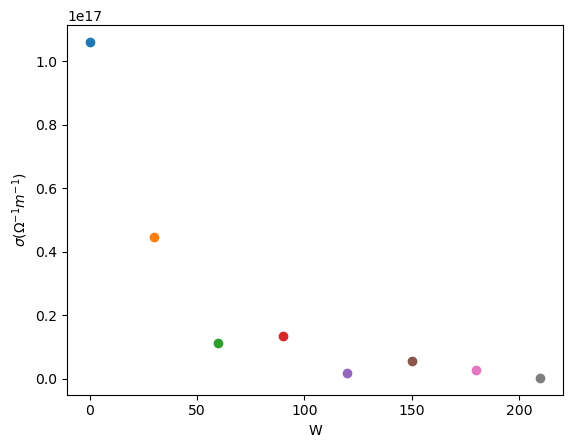

In [54]:
plt.figure()
plt.xlabel('W')
plt.ylabel(r'$\sigma (\Omega^{-1} m^{-1})$')

# Selecionando valores de W para calcular a condutividade
for W in [0, 30, 60, 90, 120, 150, 180, 210]:
    sigma = 0

    # Calculando a condutividade 200 vezes para tomar a média
    for i in range(200):
        
        # Construindo o Hamiltoniano
        H = Hamiltoniano3D(W)
        
        # Computando a função de Green
        GreenF = Green(H, 1, 1, 1)

        # Somando as contribuições de cada iteração à média
        sigma += Condutividade(GreenF, H, 1, 1, 1)/200
        
    plt.scatter(W, sigma.real)

$\quad$ Como podemos ver no gráfico acima, a condutividade decresce rapidamente em direção ao $0$ conforme aumentamos $W$, de acordo com a predição de que o sistema rapidamente se torna isolante acima do valor crítico da desordem. Vale mencionar que, de acordo com $\textbf{[6]}$, a condutividade elétrica não é um valor particularmente bem representado pela média e pode sofrer fortes oscilações em torno dela, então caso tente recriar essa figura você mesmo, é possível que observe alguns pontos em posições estranhas no gráfico de dispersão. O comportamento qualitativo do gráfico, porém, deve se manter consistente no geral.

## 5. Conclusão

$\quad$ Neste `Notebook`, investigamos a fundo o fenômeno da localização de Anderson. Introduzimos os operadores de criação e aniquilação fermiônicos $a^{\textdagger}$ e $a$ e os utilizamos juntamente às suas transformadas de Fourier para construir e solucionar o famoso modelo _tight-binding_ analiticamente. A partir do modelo _tight-binding_, adicionamos um termo de desordem ao seu Hamiltoniano para chegar ao modelo de Anderson e o estudamos numericamente em 1 dimensão.

$\quad$ Tendo compreendido melhor esses dois modelos. Passamos ao caso tridimensional numa rede cristalina cúbica e observamos transições condutor-isolante, tanto ao aumentar a intensidade $W$ da desordem como ao cruzar as pontas de mobilidade. Assim, caracterizando as fases condutoras como sistemas difusivos e as fases isolantes como sistemas localizados, com elétrons confinados a pequenas regiões do espaço e incapazes de transportar corrente. Por fim, utilizamos um método de funções de Green para calcular a condutividade elétrica do modelo de Anderson partindo de primeiros princípios e verificamos quantitativamente nossas predições anteriores sobre fenômenos de transporte nesse modelo.

## 6. Referências

$\textbf{[1]}$  Kittel, Charles. Introduction to Solid State Physics, 8th Edition. John Wiley & Sons, Inc, 2005.

$\textbf{[2]}$  Bruus, Henrik; Flensberg, Karsten. Introduction to Many-Body Theory in Condensed Matter Physics. University of Copenhagen, 2002.

$\textbf{[3]}$  Anderson, Philip W.. Absence of Diffusion in Certain Random Lattices. Physical Review Vol. 109 (5), 1958.

$\textbf{[4]}$  Guan, Chenguang; Guan, Xingyue. A Brief Introduction to Anderson Localization. Massachussets Institute of Technology, 2019.

$\textbf{[5]}$  Mott, Neville. F.; Twose, W. D.. The theory of impurity conduction. Advances in Physics Vol. 10(38), 1961.

$\textbf{[6]}$  Markos, Peter. Numerical Analysis of the Anderson Localization. Acta Physica Slovaca Vol. 56, 2006.

$\textbf{[7]}$ Mott, Neville F.. The electrical properties of liquid mercury. The Philosophical Magazine: A Journal of Theoretical Experimental and Applied Physics, Vol. 13(125), 1966.

$\textbf{[8]}$ Mueller, Erich. Green's Function Approach to Transport: Basic Training in Condensed Matter Physics. Cornell University, 2018.